In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("datasetHeartDisease.csv") #ReadingCSVFile

In [3]:
df.info() #InfoAboutDataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df_dup=df.duplicated().any() #CheckingForDuplicateValues

In [6]:
df_dup

True

In [7]:
#droppingDuplicatedValues

In [13]:
df_dup=df.drop_duplicates()
df_dup=df.duplicated().any()
df_dup

True

In [16]:
# Remove duplicate rows
df_dup = df.drop_duplicates()

# Check if any duplicate rows exist in the original DataFrame
any_duplicates = df.duplicated().any()
any_duplicates_after_removal = df_dup.duplicated().any()


In [17]:
any_duplicates_after_removal

False

<Axes: >

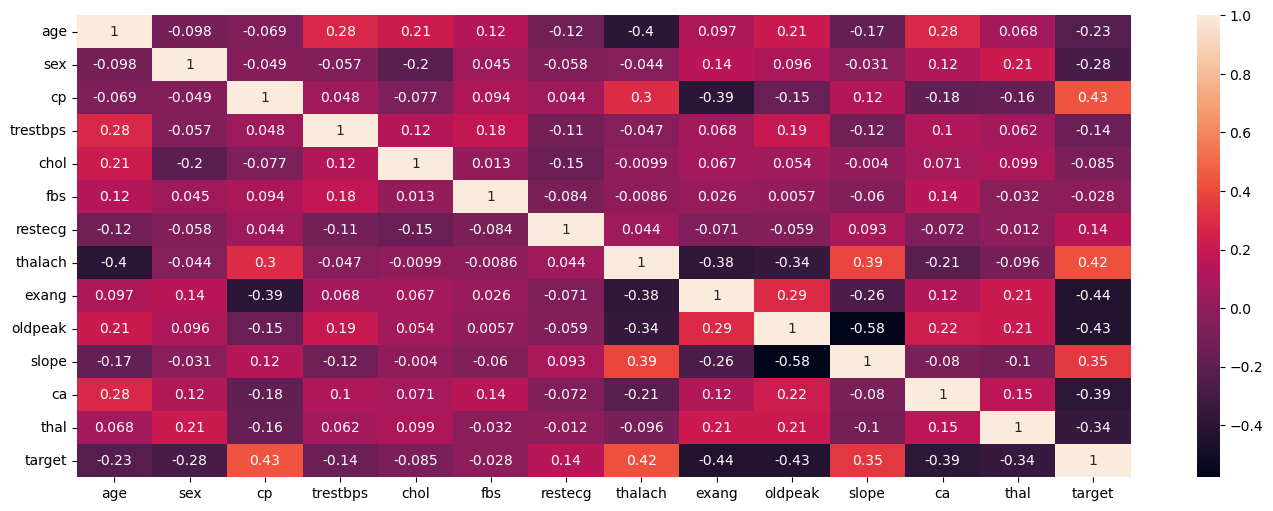

In [1]:
#Check for correlation matrix(done on next day)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('datasetHeartDisease.csv')
df.corr()
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)


In [20]:
#Data Processing
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [21]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [22]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [23]:
#Encoding of Categorical Data

In [24]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [25]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [26]:
cate_val.remove('sex')
cate_val.remove('target')

In [27]:
pd.get_dummies(df,columns=cate_val,drop_first=True)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,123,0.2,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,1,110,264,132,1.2,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,141,3.4,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,115,1.2,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [28]:
#Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
st=StandardScaler()

In [31]:
df[cont_val]= st.fit_transform(df[cont_val])

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [33]:
#Test Train Split
X=df.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3


In [34]:
y=df['target']

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,-1.363869,1,1,-0.663867,0.941846,0,1,0.540209,0,-0.896862,2,0,2
202,0.400752,1,0,1.049520,0.458709,0,0,-1.690047,1,-0.206705,2,0,3
196,-0.922713,1,2,1.049520,-0.294985,0,1,-0.115749,0,2.208842,1,0,2
75,0.069886,0,1,0.192827,0.072199,0,0,0.496478,0,0.310912,1,0,2
176,0.621330,1,0,-0.835206,-0.314310,1,1,0.452748,1,0.310912,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.481558,1,2,0.478391,-0.256334,0,1,0.583939,0,-0.379244,1,1,3
71,-0.371269,1,2,-2.148802,-0.372287,0,1,0.190365,1,-0.896862,2,1,3
106,1.613930,1,3,1.620649,-0.237008,1,0,-0.815437,0,-0.810592,1,1,2
270,-0.922713,1,0,-0.663867,0.052874,0,0,-0.246940,0,-0.206705,2,0,3


In [39]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [40]:
#Logistic Regression

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log= LogisticRegression()

In [44]:
log.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred1= log.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_pred1)

0.8524590163934426

In [48]:
#Support Vector Classifier

In [50]:
from sklearn import svm

In [51]:
svm=svm.SVC()

In [52]:
svm.fit(X_train,y_train)

SVC()

In [53]:
y_pred2=svm.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

In [55]:
#KNeighbours Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn= KNeighborsClassifier()

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred3=knn.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [61]:
score=[]

In [63]:
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [64]:
score

[0.819672131147541,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934]

In [68]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8852459016393442

In [70]:
#Non-Linear ML Algorithms
data=pd.read_csv('datasetHeartDisease.csv')

In [71]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
data = data.drop_duplicates()

In [73]:
X=data.drop('target',axis=1)

In [74]:
y=data['target']

In [75]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
#Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt=DecisionTreeClassifier()

In [79]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
y_pred4=dt.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

In [82]:
#Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf=RandomForestClassifier()

In [85]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
y_pred5= rf.predict(X_test)

In [87]:
accuracy_score(y_test,y_pred5)

0.8852459016393442

In [88]:
#Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gbc=GradientBoostingClassifier()

In [92]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [93]:
y_pred6= gbc.predict(X_test)

In [94]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [96]:
final_Data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                        accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),
                        accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [97]:
final_Data #ACC is stands for AccuracyScores

,Models,ACC
0,LR,0.852459
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.786885
4,RF,0.885246
5,GB,0.852459


In [98]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

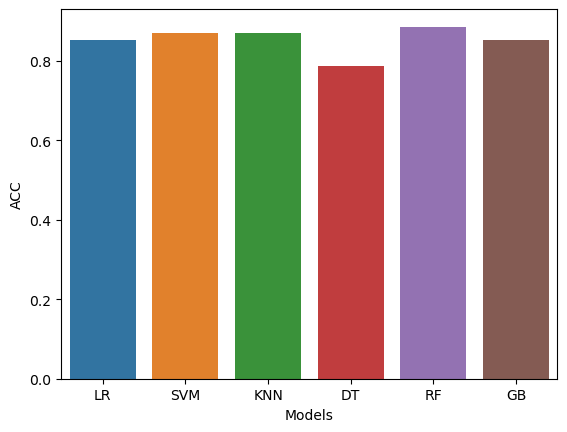

In [102]:
sns.barplot(x='Models', y='ACC', data=final_Data)


In [103]:
#Thus Random Forest will be used for production

In [104]:
X= data.drop('target',axis=1)
y=data['target']

In [105]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [106]:
rf= RandomForestClassifier()

In [107]:
rf.fit(X,y)

RandomForestClassifier()

In [108]:
new_data = pd.DataFrame({'age': [52],
                         'sex': [1],
                         'cp': [0],
                         'trestbps': [125],
                         'chol': [212],
                         'fbs': [0],
                         'restecg': [1],
                         'thalach': [168],
                         'exang': [0],
                         'oldpeak': [1.0],
                         'slope': [2],
                         'ca': [2],
                         'thal': [3]},
                        index=[0])


In [109]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [111]:
p=rf.predict(new_data)
if p[0]==0:
    print("NO Disease")
else:
    print("Disease")

NO Disease


In [112]:
#Save Using Joblib

In [113]:
import joblib

In [114]:
joblib.dump(rf,'model_joblib_heartDisease')

['model_joblib_heartDisease']

In [115]:
model= joblib.load('model_joblib_heartDisease')

In [116]:
model.predict(new_data)

array([0], dtype=int64)

In [117]:
#GUI

In [118]:
from tkinter import *
import joblib

In [124]:
from tkinter import *
import joblib

master = Tk()
master.title("Heart Disease Prediction System")

Label(master, text="Heart Disease Prediction System", bg="black", fg="white").grid(row=0, columnspan=2)

Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male or Female[1/0]").grid(row=2)
Label(master, text="Enter the value of Chest Pain").grid(row=3)
Label(master, text="Enter the value of trestbps").grid(row=4)
Label(master, text="Enter the value of chol").grid(row=5)
Label(master, text="Enter the value of fbs").grid(row=6)
Label(master, text="Enter the value of restecg").grid(row=7)
Label(master, text="Enter the value of thalach").grid(row=8)
Label(master, text="Enter the value of exang").grid(row=9)
Label(master, text="Enter the value of oldpeak").grid(row=10)
Label(master, text="Enter the value of slope").grid(row=11)
Label(master, text="Enter the value of ca").grid(row=12)
Label(master, text="Enter the value of thal").grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    
    model = joblib.load('model_joblib_heartDisease')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Diseases").grid(row=31, columnspan=2)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31, columnspan=2)

Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=0, sticky=W, pady=4)
mainloop()
